# Model Setup and Troubleshooting

In [1139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [1140]:
# Reading in the cleaned train dataset, which includes SalePrice
ames_train_clean = pd.read_csv('./datasets/train_cleaned_x_vars.csv')

In [1141]:
# Reading in the transformed train dataset
X_complete_train = pd.read_csv('./datasets/train_transformed_x_vars.csv')

In [1142]:
# Reading in the transformed test dataset
X_complete_test = pd.read_csv('./datasets/test_transformed_x_vars.csv')

### Scaling Model Fitting

In [1143]:
# Creating the y variable
y = ames_train_clean['SalePrice']

In [1144]:
print(y.shape)
print(X_complete_train.shape)
print(X_complete_test.shape)

(2044,)
(2044, 193)
(878, 188)


In [1145]:
# Making a list of columns that are in the train dataset that aren't in test dataset
remove_from_train = []
for i in X_complete_train.columns:
        if i not in X_complete_test.columns:
            remove_from_train.append(i)

In [1146]:
# Making a list of columns that are in the test dataset that aren't in train dataset
remove_from_test = []
for i in X_complete_test.columns:
        if i not in X_complete_train.columns:
            remove_from_test.append(i)

In [1147]:
print(remove_from_train)
print()
print(remove_from_test)

['MS SubClass_150', 'MS Zoning_C (all)', 'Utilities_NoSeWa', 'Neighborhood_GrnHill', 'Neighborhood_Landmrk', 'Heating QC_Po']

['Sale Type_VWD']


In [1148]:
# Removing the columns in X_complete_train that aren't in X_complete_test and
# column in X_complete_test that isn't in X_complete_train so that X_complete_test can fit in the model
X_complete_train = X_complete_train.drop(columns = remove_from_train)
X_complete_train = X_complete_train.drop(columns = ['Unnamed: 0'])
X_complete_test = X_complete_test.drop(columns = remove_from_test)
X_complete_test = X_complete_test.drop(columns = ['Unnamed: 0'])

In [1149]:
# Columns for the train and test datasets now match
print(y.shape)
print(X_complete_train.shape)
print(X_complete_test.shape)

(2044,)
(2044, 186)
(878, 186)


In [1150]:
# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X_complete_train, y, train_size=.75, random_state=42)

In [1151]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1533, 186)
(511, 186)
(1533,)
(511,)


In [1152]:
# Scaling train/test/split data
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [1153]:
# Fitting a linear regression model with the scaled training data from train/test/split
tts_lr = LinearRegression()
tts_lr.fit(Z_train, y_train)

LinearRegression()

In [1154]:
# I'm unsure why the score is a large negative number for the test data (from train/test/split)
print(tts_lr.score(Z_train, y_train))
print(tts_lr.score(Z_test, y_test))

0.9309070628472298
-3730570986371491.0


In [1155]:
# Scaling the final data.
ss_final = StandardScaler()
final_train = ss_final.fit_transform(X_complete_train)
final_submission = ss_final.transform(X_complete_test)

In [1156]:
# Creating linear regression model using scaled data to fit
lr = LinearRegression()
lr.fit(final_train, y)

LinearRegression()

In [1157]:
# R2 score for the complete train dataset
print(lr.score(final_train, y))

0.9331568460511934


In [1158]:
# Creating a ridge model to regularize features and prevent overfitting

from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=10)

ridge_model.fit(final_train, y)

Ridge(alpha=10)

In [1159]:
# R2 scores of my ridge model for train data. Testing data score is much improved using 
# ridge model over the lr model
print(ridge_model.score(Z_train, y_train))
print(ridge_model.score(Z_test, y_test))
print(ridge_model.score(final_train, y))

0.9255256217876527
0.9455020858002396
0.9312557299500153


Standard deviation of residuals: 18286.0


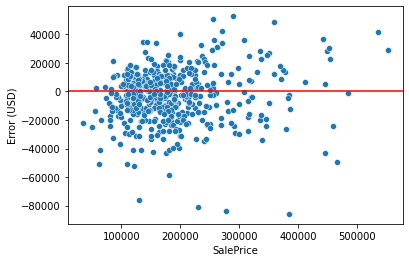

In [1160]:
# Plotting Sale Price of the test data against the residuals of the test data (from train/test/split)
resids = y_test - y_pred_test
sns.scatterplot(x = y_test, y = resids)
plt.ylabel('Error (USD)')
plt.axhline(0, color='r');

print("Standard deviation of residuals:", round(resids.std(), 0))

/Users/gcano01/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


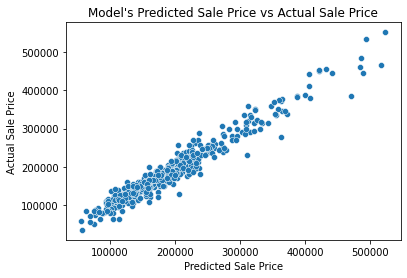

In [1161]:
# sns.scatterplot(y_pred, y_train);
sns.scatterplot(y_pred_test, y_test, palette='GrBl')
plt.title('Model\'s Predicted Sale Price vs Actual Sale Price')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price');

In [1162]:
# Calculating RMSE for the training data and testing data (from train/test/split)
rmse_train = mean_squared_error(y_train, y_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

In [1163]:
print(rmse_train)
print(rmse_test)

21453.429366736305
18554.957978277638


In [1165]:
# Trying the lasso model out
from sklearn.linear_model import Lasso, LassoCV

# Setting up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validating over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=5000)

# Fitting model using best ridge alpha
lasso_cv.fit(final_train, y);

/Users/gcano01/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223081294567.99945, tolerance: 1016213100.7493881
  model = cd_fast.enet_coordinate_descent_gram(
/Users/gcano01/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153711889558.43457, tolerance: 1016213100.7493881
  model = cd_fast.enet_coordinate_descent_gram(
/Users/gcano01/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86927296671.85284, tolerance: 1016213100.7493881
  model = cd_fast.enet_coordinate_descent_gram(
/Users/gcano01/opt/anaconda3/lib/python3.8/site

In [1166]:
print(lasso_cv.score(final_train, y))

0.9335344449991874


### Prepping CSVs for submission

In [1167]:
# Making a submission using lasso model
y_submission_lasso = lasso_cv.predict(final_submission)

In [1168]:
y_submission_lasso = pd.DataFrame(y_submission_lasso)

In [1169]:
# Loading in original test dataframe to grab the ID column
ames_test = pd.read_csv('./datasets/test.csv')

In [1170]:
# Combining the model predictions for SalePrice with the ID columns from the original test dataset
submit_final_lasso = pd.concat([ames_test['Id'], y_submission_lasso], axis=1, ignore_index=False)

In [1171]:
# Renaming the column titles so that they match the format for the Kaggle submission
submit_final_lasso.rename(columns = {0:'SalePrice'}, inplace=True)

In [1172]:
# The Kaggle score for this model was not as good as the ridge model's score
submit_final_lasso.to_csv('./datasets/submission_lasso.csv', header=['Id', 'SalePrice'], index=False)

In [1132]:
# Making submission using ridge model
y_submission = ridge_model.predict(final_submission)

In [1133]:
y_submission = pd.DataFrame(y_submission)

In [1134]:
# Combining the model predictions for SalePrice with the ID columns from the original test dataset
submit_final = pd.concat([ames_test['Id'], y_submission], axis=1, ignore_index=False)

In [1135]:
submit_final.head()

,Id,0
0,2658,135716.337121
1,2718,171257.498853
2,2414,205313.652607
3,1989,91939.628924
4,625,181838.203960


In [1136]:
# Renaming the column titles so that they match the format for the Kaggle submission
submit_final.rename(columns = {0:'SalePrice'}, inplace=True)

In [1137]:
submit_final.head()

,Id,SalePrice
0,2658,135716.337121
1,2718,171257.498853
2,2414,205313.652607
3,1989,91939.628924
4,625,181838.203960


In [1138]:
submit_final.to_csv('./datasets/final_submission.csv', header=['Id', 'SalePrice'], index=False)

I had made two other final_submission csvs and final_submission_2 got me the best Kaggle score. I mistakenly wrote over the code used to get the final_submission_2 csv, but it was structurally the same process behind creating the final_submission_3 csv, just with some minor differences concerning feature engineering a few columns.